아래의 코드에서 사용될 패키지들 입니다. \
없으면 미리 다운로드 받으시면 흐름 끊기지 않고 진행 가능합니다.

참고로 맥북이나 리눅스의 경우 visualization 파트에서 막힐 가능성이 높은데 \
미리 확인해보고 잘 안될 것 같으면 윈도우로 코드 돌리시는걸 추천합니다. 

In [ ]:
# #기본
# import pandas as pd
# import numpy as np
# from tqdm import tqdm

# #토크나이징
# from konlpy.tag import Okt

# #Word 2 Vector
# from gensim.models import Word2Vec

# #visualization
# import networkx as nx
# import matplotlib.font_manager as fm
# import matplotlib

prepare dataset

In [2]:
import pandas as pd

In [10]:
df = pd.read_csv("./data/파일이름.csv", encoding='utf-8', index_col=0)
df = pd.read_csv("./data/coupang.csv", encoding='utf-8', index_col=0)

/tmp/ipykernel_28064/4184602919.py:1: DtypeWarning: Columns (21,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/coupang.csv", encoding='utf-8', index_col=0)


In [14]:
df = df.drop_duplicates('본문').reset_index(drop = True)

추가적으로 민원을 통쨰로 제거할 필요가 있는 경우 \
이 부분에 코드를 추가하세요

In [16]:
text = df['본문']

In [17]:
text

0        현 국민연금 가입내역 안내서 에서 일용직 아르바이트 쿠팡문류센터에서 근무한기록이 있...
1        최근 에 제 상황들을 한국 서울 국가인권위원회에서 \r\n\r\n국비지원진로준비들중...
2        1993 년생 윤은주 라고 합니다 .\r\n최근에 저나 제 식구들을\r\n보호하거나...
3        안녕하세요~\r\n\r\n갑자기 추워진 날씨에 수고가 많으십니다. \r\n\r\n저...
4        관련자료\r\n\r\nhttps://www.youtube.com/watch?v=yb...
                               ...                        
23126    물류센터 반대 민원\r\n검단신도시 물류유통3 재검토 및 공청회 요청\r\n\r\n...
23127    이랜드몰에서 청소기를 샀는데요\n받아서 사용하는데 대가 휘어져있는거에요? 그리고 제...
23128    제가 쿠팡에서 아래 식품&#x28;육회&#x29;를 9.16&#x28;금&#x29;...
23129    우체국 쇼핑이고 농협이고 k쇼핑이고 다 반품 안된다고 하고요\n그래서 오미자주스 1...
23130    안녕하세요.\r\n\r\n저는 국민신문고를 통하여 방송통신기자재의 전파법 미준수한 ...
Name: 본문, Length: 23131, dtype: object

Tokenizing

토크나이징에는 konlpy의 Okt를 사용합니다. \
패키지가 없으면 다운로드 받으시고, 다른 pos tagger를 사용하고 싶으시면 수정하세요

In [22]:
from konlpy.tag import Okt
from tqdm import tqdm

In [23]:
okt = Okt()

def tokenizing(x):
    lst = []
    for item in tqdm(x):
        if len(str(item)) > 1000:
            lst.append(["Too Long"])
        else:
            lst.append(okt.nouns(str(item)))
    return lst

In [25]:
#민원에 양에 따라 시간이 조금 걸릴 수도 있습니다.
#민원의 길이가 1000글자 이상일 경우 토크나이징을 수행하지 않고 Too Long이라는 토큰으로 대치합니다.
tokens = tokenizing(text)

100%|██████████| 23131/23131 [05:19<00:00, 72.46it/s] 


In [27]:
len(tokens)

23131

stopwords 제거하고 싶으면 여기서 하세요

Word 2 Vector : Target keyword랑 유사한 의미 좌표에 위치하는 keyword를 발견

In [28]:
from gensim.models import Word2Vec

In [31]:
# input, 모델크기, 주변 몇단어까지 학습할지, 최소 등장 횟수, worker수
model = Word2Vec(tokens, window=10, min_count=10, workers= 8)

Visualization

In [40]:
import networkx as nx

키워드 네트워크를 통해 시각화

In [41]:
g = nx.Graph()

In [46]:
center_keyword = '쿠팡' #이 민원이 무엇을 키워드로 뽑은 민원인지 적어주면 됩니다.
depth1 = model.wv.most_similar(center_keyword, topn=30)

In [50]:
for node, weight in depth1:
    g.add_edge(center_keyword, node, weight = weight)

In [57]:
nodes = list(g.nodes())
nodes.remove(center_keyword)

In [63]:
depth2 = {}

for node in nodes:
    temp = model.wv.most_similar(node, topn = 5)
    depth2[node] = temp

In [68]:
for key in depth2.keys():
    for node, weight in depth2[key]:
        g.add_edge(key, node, weight=weight)

맥북이나 리눅스의 경우 기본적으로 plt에서 지원하는 한글폰트가 없습니다. 

'맥북 plt 한글' 등으로 검색해서 다운로드 받아서 아래의 코드를 실행하거나 

윈도우를 쓰는 친한 친구에게 그냥 코드 돌려달라고 부탁해보세요

In [77]:
import matplotlib.font_manager as fm
import matplotlib

#Change font path fit to your enviroment
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf").get_name()

matplotlib.rcParams['font.family'] ='NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] =False

{('쿠팡',
  '악성'): Text(0.16551299869319053, 0.07733695516149733, '0.4558255076408386'),
 ('쿠팡',
  '여러'): Text(0.06179840476260996, 0.14586880605013938, '0.42807310819625854'),
 ('쿠팡',
  '타'): Text(-0.015462142633063797, 0.160620586064076, '0.42318013310432434'),
 ('쿠팡',
  '자인'): Text(-0.05600216401748337, 0.14519213914973894, '0.4186227321624756'),
 ('쿠팡',
  '통'): Text(-0.07570761987940224, 0.10062006922485034, '0.39618903398513794'),
 ('쿠팡',
  '도매꾹'): Text(-0.11480157692447855, 0.08778690362322308, '0.3886796236038208'),
 ('쿠팡',
  '출고'): Text(-0.14270399268899958, 0.03897967939723375, '0.3825439512729645'),
 ('쿠팡',
  '위메프'): Text(0.01394207520468078, 0.0966601207614712, '0.3753683269023895'),
 ('쿠팡',
  '한진택배'): Text(-0.11292490308239635, -0.09020040363890475, '0.3682372272014618'),
 ('쿠팡',
  '국제'): Text(-0.08722881787120411, 0.055553469689519214, '0.3650405704975128'),
 ('쿠팡',
  '통해'): Text(-0.1265020861472623, -0.03356171117341983, '0.36495548486709595'),
 ('쿠팡',
  '플랫폼'): Text(-0.054

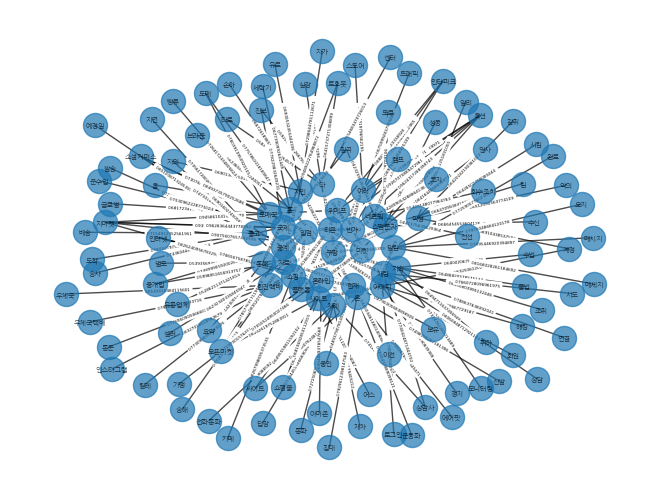

In [96]:
pos = nx.kamada_kawai_layout(g)
labels = nx.get_edge_attributes(g, 'weight')
nx.draw(g, pos = pos, with_labels = True, font_family = font_name, font_size = 5, alpha = 0.7)
nx.draw_networkx_edge_labels(g, edge_labels=labels, font_size = 3, pos = pos)

민원을 추출할때 사용한 타겟 키워드를 중심으로 2 depth의 키워드 네트워크를 생성하여 \
추출된 민원의 키워드와 동시 출현 연관성이 높은 키워드들을 확인할 수 있습니다.

예를 들어 "쿠팡"과 관련된 민원에는 티몬, 11번가, 스팸 등의 키워드들이 자주 함께 등장하는 것을 볼 수 있습니다.